In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [57]:
data_titanic = pd.read_csv("train.csv")

In [58]:
# Data preprocessing(task1 -Q1)

# Filling missing values in 'Age' with median
data_titanic['Age'] = data_titanic['Age'].fillna(data_titanic['Age'].median())

# Filling missing values in 'Embarked' with mode
data_titanic['Embarked'] = data_titanic['Embarked'].fillna(data_titanic['Embarked'].mode()[0])

# Droping columns 'Cabin', 'Name', 'Ticket', 'PassengerId'
data_titanic.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [59]:
# Encoding categorical variables by Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

# Creating an OrdinalEncoder object
ordinal_encoder = OrdinalEncoder()

# Encode categorical columns
data_titanic[['Sex', 'Embarked']] = ordinal_encoder.fit_transform(data_titanic[['Sex', 'Embarked']])


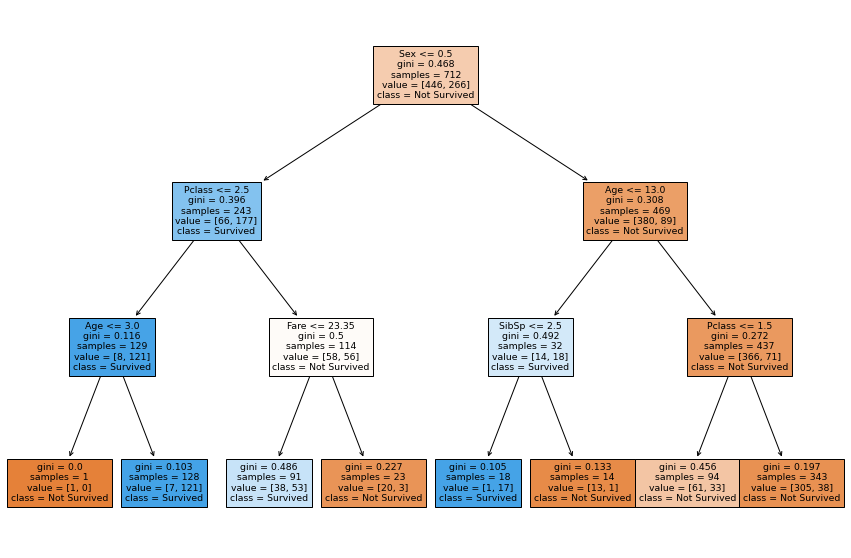

In [60]:
#Fine tuning our decision tree model and plotting it (task1 -Q2)
X = data_titanic.drop('Survived', axis=1)
y = data_titanic['Survived']

# Applying Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Training Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=40,max_depth=3)
decision_tree.fit(X_train, y_train)

# Plotting  the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()


In [63]:
#Calculating average classification accuracy for our decision tree model (task1 -Q3)
from sklearn.model_selection import cross_val_score

# Perform five-fold cross-validation
cross_val_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)

# Calculate the average classification accuracy
average_accuracy = cross_val_scores.mean()

print("Average Classification Accuracy:", average_accuracy)


Average Classification Accuracy: 0.8132177681473456


In [62]:
#Fine tuning our Random forrest model and checking its accuracy (task1 -Q4)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

random_forest_model = RandomForestClassifier(random_state=40)
random_forest_model.fit(X_train, y_train)
cross_val_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)
# Calculate average classification accuracy
average_accuracy = cross_val_scores.mean()

print("Average Classification Accuracy:", average_accuracy)


Average Classification Accuracy: 0.8201910765291048
